# Regularization

We use a custom generated dataset for regularization to shwo the effect to regularization.

## Dataset

In [2]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Use the helper code below to generate the data

# Defines the number of data points to generate
num_points = 100

# Generate predictor points (x) between 0 and 5
x = np.linspace(0, 5, num_points)

# Generate the response variable (y) using the predictor points
y = x * np.sin(x) + np.cos(x) + np.random.normal(loc=0, scale=1, size=num_points)

# Generate data of the true function y = x*sin(x) 
# x_b will be used for all predictions below 
x_b = np.linspace(0, 5, 100)
y_b = x_b * np.sin(x_b) + np.cos(x_b)

In [4]:
# Split the data into train and test sets with .33 and random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train = np.reshape(x_train, newshape=(-1, 1)).astype(np.float32)
x_test = np.reshape(x_test, newshape=(-1, 1)).astype(np.float32)
y_train = np.reshape(y_train, newshape=(-1, 1)).astype(np.float32)
y_test = np.reshape(y_test, newshape=(-1, 1)).astype(np.float32)

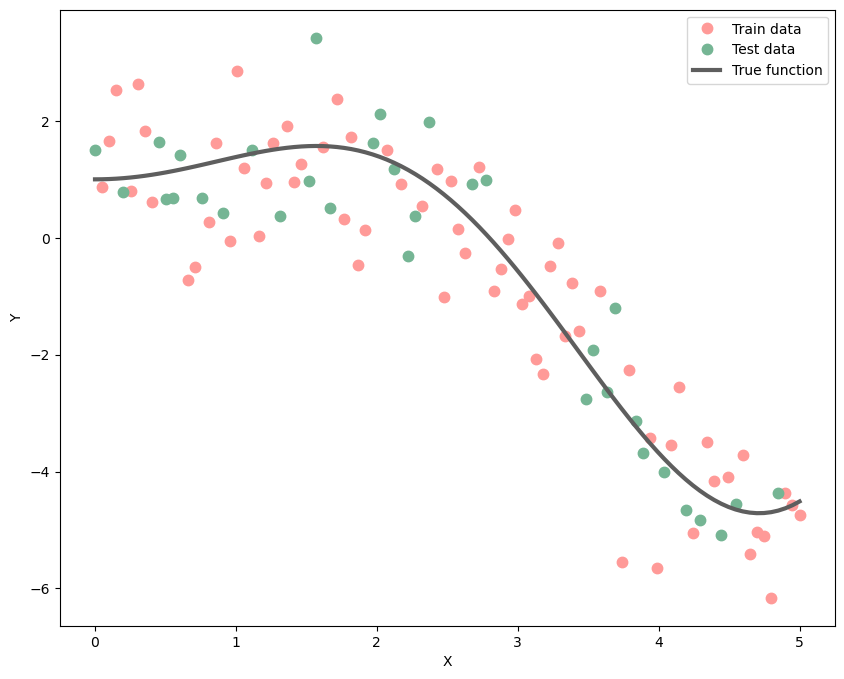

In [5]:
plt.rcParams["figure.figsize"] = (10,8)

# Plot the train data
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plot the test data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Plot the true data
plt.plot(x_b, y_b, '-', label='True function', linewidth=3, color='#5E5E5E')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Create a neural network (sequential model)

In [11]:
# Your model code here
from torch import nn
import torch
model = nn.Sequential(nn.Linear(1,1000),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1)
)

In [10]:
# Please use the training and evaluation methods for your model(s)

import torch
torch.manual_seed(42)
from torch.utils.data import DataLoader, TensorDataset

def train_model(
    model, optimizer, loss_fn, x_dataset, y_dataset, epochs, batch_size
):
    data_loader = DataLoader(dataset=TensorDataset(torch.as_tensor(x_dataset), torch.as_tensor(y_dataset)), batch_size=batch_size, shuffle=True)
    for epoch in range(0, epochs):
        for data in data_loader:
            x, y = data
            output = model(x)
            optimizer.zero_grad()
            loss = loss_fn(output, y)
            loss.backward()
            optimizer.step()
        
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}; Loss: {loss}')
    
    return model


def eval_model(
    model, x_train, y_train, x_test
):
    x_train = torch.as_tensor(x_train)
    y_train = torch.as_tensor(y_train)

    x_test = torch.as_tensor(x_test)
    # y_test = torch.as_tensor(y_test)
    
    train_output = model(x_train).detach()
    test_output = model(x_test).detach()

    plt.rcParams["figure.figsize"] = (10,8)

    # Plot the true train data
    plt.plot(x_train, y_train, '.', label='Train true data', markersize=15, color='#000000')

    # Plot the predicted train data
    plt.plot(x_train, train_output, '.', label='Train predictions', markersize=15, color='#FF9A98')

    # Plot the test predictions
    plt.plot(x_test, test_output, '.', label='Test predictions', markersize=15, color='#75B594')

    # Plot the true data
    plt.plot(x_b, y_b, '-', label='True function', linewidth=3, color='#5E5E5E')

    # Set the axes labels
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
        

## Initialize an unregularized network

In [12]:
# Init your model

import torch.optim as optim
import torch.nn.functional as F
import copy

# create your model
unregularized_model = nn.Sequential(nn.Linear(1,1000),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.LeakyReLU(),
nn.Linear(1000,1)
)
print(unregularized_model)
# Init the adam optimizer
# Define MSE loss as loss function
optim = torch.optim.Adam(unregularized_model.parameters(),lr=0.001)
loss = nn.MSELoss()

Sequential(
  (0): Linear(in_features=1, out_features=1000, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=1000, out_features=1000, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=1000, out_features=1000, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=1000, out_features=1000, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=1000, out_features=1000, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=1000, out_features=1000, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=1000, out_features=1, bias=True)
)


### Train and evalute the model

Epoch: 0; Loss: 0.7492713332176208
Epoch: 100; Loss: 0.2326631397008896
Epoch: 200; Loss: 0.7163134217262268
Epoch: 300; Loss: 1.0217046737670898
Epoch: 400; Loss: 0.2948813736438751
Epoch: 500; Loss: 0.0360584557056427
Epoch: 600; Loss: 0.3581109046936035
Epoch: 700; Loss: 1.1377800703048706
Epoch: 800; Loss: 0.755700409412384
Epoch: 900; Loss: 1.0364009141921997
Epoch: 1000; Loss: 1.10724937915802
Epoch: 1100; Loss: 0.703962504863739
Epoch: 1200; Loss: 1.2464797496795654
Epoch: 1300; Loss: 0.907123863697052
Epoch: 1400; Loss: 3.10400128364563


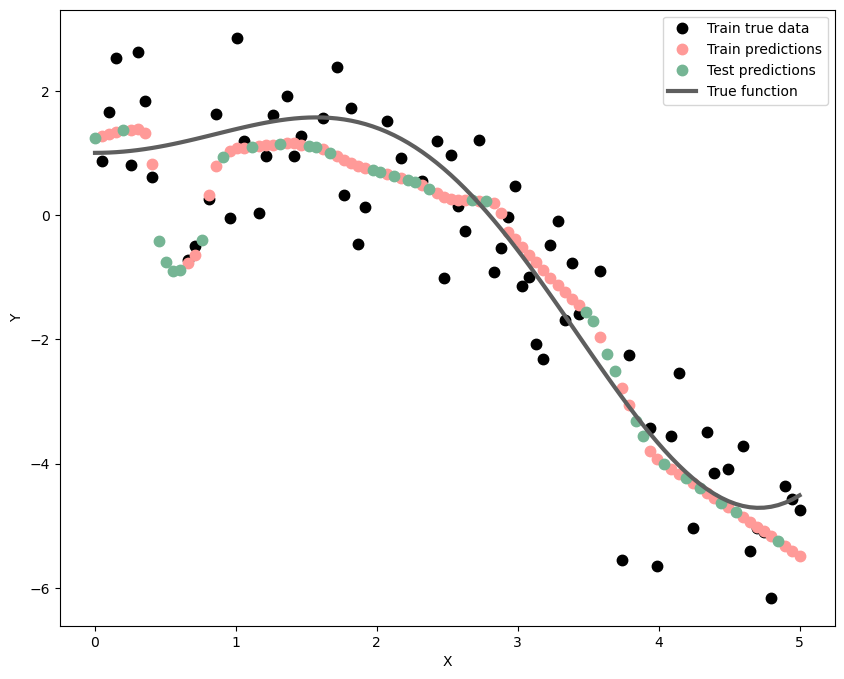

In [143]:
# use a batch size of 10
# use 1500 epochs for training

# use the train_model method to train the model
# use the eval_model method to plot the results

train_model(model= unregularized_model,optimizer=optim, loss_fn=loss, x_dataset = x_train, y_dataset = y_train, epochs=1500, batch_size=10 )
eval_model(unregularized_model, x_train=x_train, y_train=y_train,x_test=x_test)

## Initialize a neural network with dropout

In [13]:
# Init your model


import torch.optim as optim
import torch.nn.functional as F

# create your model
dropout_model =nn.Sequential(nn.Linear(1,1000),
nn.Dropout(p=0.5),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.Dropout(p=0.5),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.Dropout(p=0.5),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.Dropout(p=0.5),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.Dropout(p=0.5),
nn.LeakyReLU(),
nn.Linear(1000,1000),
nn.Dropout(p=0.5),
nn.LeakyReLU(),
nn.Linear(1000,1)
)
print(dropout_model)

# Init the adam optimizer
# Define MSE loss as loss function
optim = torch.optim.Adam(dropout_model.parameters(),lr=0.0001)
loss = nn.MSELoss()

Sequential(
  (0): Linear(in_features=1, out_features=1000, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Linear(in_features=1000, out_features=1000, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=1000, out_features=1000, bias=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): LeakyReLU(negative_slope=0.01)
  (9): Linear(in_features=1000, out_features=1000, bias=True)
  (10): Dropout(p=0.5, inplace=False)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=1000, out_features=1000, bias=True)
  (13): Dropout(p=0.5, inplace=False)
  (14): LeakyReLU(negative_slope=0.01)
  (15): Linear(in_features=1000, out_features=1000, bias=True)
  (16): Dropout(p=0.5, inplace=False)
  (17): LeakyReLU(negative_slope=0.01)
  (18): Linear(in_features=1000, out_features=1, bias=True)
)


### Train and evalute the model

Epoch: 0; Loss: 0.6597087979316711
Epoch: 100; Loss: 1.9953845739364624
Epoch: 200; Loss: 0.509282648563385
Epoch: 300; Loss: 0.8527534604072571
Epoch: 400; Loss: 1.037462592124939
Epoch: 500; Loss: 1.5902998447418213
Epoch: 600; Loss: 2.8000686168670654
Epoch: 700; Loss: 1.173217535018921
Epoch: 800; Loss: 0.5485485792160034
Epoch: 900; Loss: 1.0705169439315796
Epoch: 1000; Loss: 0.5617104768753052
Epoch: 1100; Loss: 1.471308708190918
Epoch: 1200; Loss: 1.2787796258926392
Epoch: 1300; Loss: 1.0506664514541626
Epoch: 1400; Loss: 1.6797715425491333


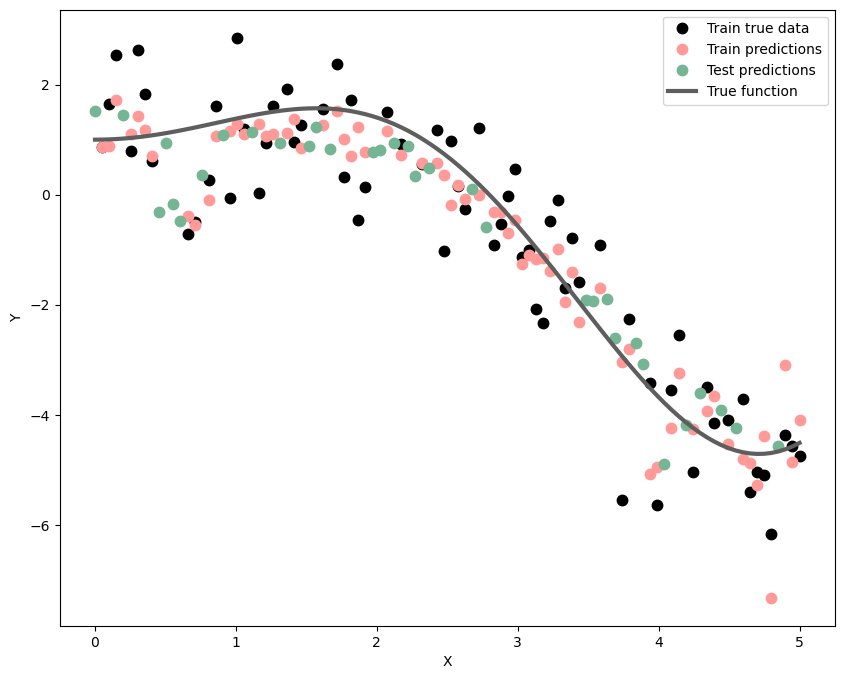

In [159]:
# use a batch size of 10
# use 1500 epochs

# use the train_model method to train the model
# use the eval_model method to plot the results
train_model(model= dropout_model,optimizer=optim, loss_fn=loss, x_dataset = x_train, y_dataset = y_train, epochs=1500, batch_size=10 )
eval_model(dropout_model, x_train=x_train, y_train=y_train,x_test=x_test)


## Initialize a model with L2 regularization

In [16]:
# Init your model

import torch.optim as optim
import torch.nn.functional as F

# create your model
l2_model = nn.Sequential(nn.Linear(1,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1)
)
print(l2_model)

# Init the adam optimizer
    # L2 regularization can be implemented by a parameter of the optimizer (no need to do it manually)
# Define MSE loss as loss function
optim = torch.optim.Adam(l2_model.parameters(),lr=0.0001, weight_decay=0.1)
loss = nn.MSELoss()

Sequential(
  (0): Linear(in_features=1, out_features=1000, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=1000, out_features=1000, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=1000, out_features=1000, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=1000, out_features=1000, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=1000, out_features=1000, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=1000, out_features=1000, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=1000, out_features=1, bias=True)
)


### Train and evaluate the model

Epoch: 0; Loss: 2.4725418090820312
Epoch: 100; Loss: 1.541940689086914
Epoch: 200; Loss: 0.6434023976325989
Epoch: 300; Loss: 0.6444697976112366
Epoch: 400; Loss: 2.201205015182495
Epoch: 500; Loss: 0.8195931315422058
Epoch: 600; Loss: 0.7424604296684265
Epoch: 700; Loss: 1.0776901245117188
Epoch: 800; Loss: 0.8439256548881531
Epoch: 900; Loss: 1.2882572412490845
Epoch: 1000; Loss: 0.9306784868240356
Epoch: 1100; Loss: 2.7618401050567627
Epoch: 1200; Loss: 0.8845735788345337
Epoch: 1300; Loss: 1.776615023612976
Epoch: 1400; Loss: 0.5907334685325623


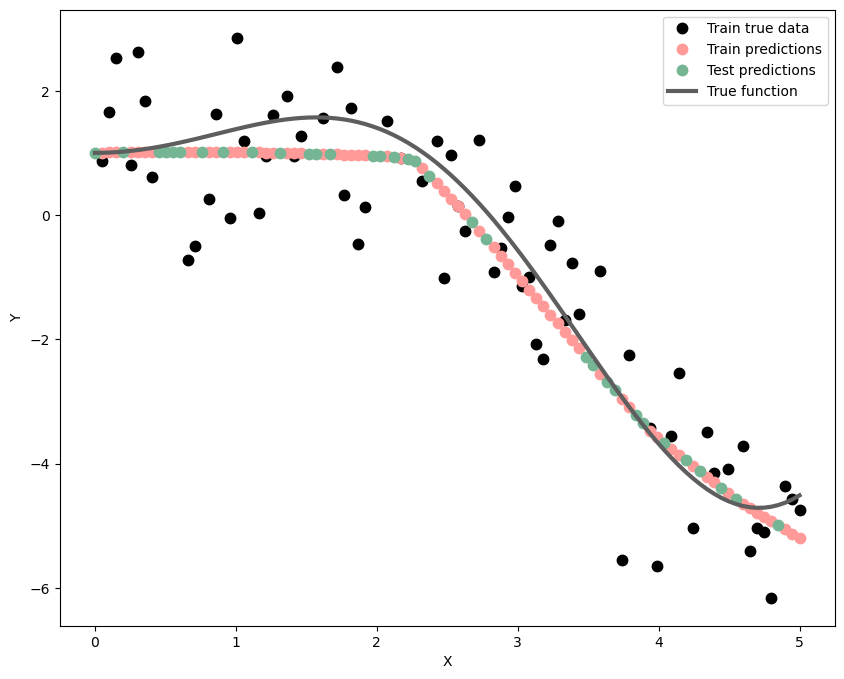

In [17]:
# use a batch size of 10
# use 1500 epochs

# use the train_model method to train the model
# use the eval_model method to plot the results

train_model(model= l2_model,optimizer=optim, loss_fn=loss, x_dataset = x_train, y_dataset = y_train, epochs=1500, batch_size=10 )
eval_model(l2_model, x_train=x_train, y_train=y_train,x_test=x_test)

## Initialize a model with L1 regularization

In [195]:
# Init your model

import torch.optim as optim
import torch.nn.functional as F

# create your model
l1_model = nn.Sequential(nn.Linear(1,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1000),

nn.LeakyReLU(),
nn.Linear(1000,1)
)

# weights = [torch.norm(p, p=1) for p in model.parameters()]


# Init the adam optimizer
    # L1 regularization has to be implemented manually. There is no pre-defined function to use.
# Define MSE loss as loss function and add the l1 regularization
    # You have to access all the weights from the network (see previous practicals on how to do this)

def train_modelL1(
    model, optimizer, loss_fn, x_dataset, y_dataset, epochs, batch_size, l1Lambda=0.001
):
    data_loader = DataLoader(dataset=TensorDataset(torch.as_tensor(x_dataset), torch.as_tensor(y_dataset)), batch_size=batch_size, shuffle=True)
    for epoch in range(0, epochs):
        for data in data_loader:
            x, y = data
            output = model(x)
            optimizer.zero_grad()
            loss = loss_fn(output, y) + l1Lambda * torch.sum(torch.stack([torch.norm(p, p=1) for p in model.parameters()]))
            loss.backward()
            optimizer.step()
        
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}; Loss: {loss}')
    
    return model

optim = torch.optim.Adam(l1_model.parameters(),lr=0.0001)
loss = nn.MSELoss()

### Train and evaluate the model

Epoch: 0; Loss: 83.46678924560547
Epoch: 100; Loss: 8.658537864685059
Epoch: 200; Loss: 5.317193031311035
Epoch: 300; Loss: 3.522448778152466
Epoch: 400; Loss: 2.561816453933716
Epoch: 500; Loss: 2.901956558227539
Epoch: 600; Loss: 2.098104953765869
Epoch: 700; Loss: 1.8274917602539062
Epoch: 800; Loss: 3.3524723052978516
Epoch: 900; Loss: 1.6459238529205322
Epoch: 1000; Loss: 1.8861749172210693
Epoch: 1100; Loss: 2.5658929347991943
Epoch: 1200; Loss: 2.461073875427246
Epoch: 1300; Loss: 1.6426060199737549
Epoch: 1400; Loss: 1.4468140602111816


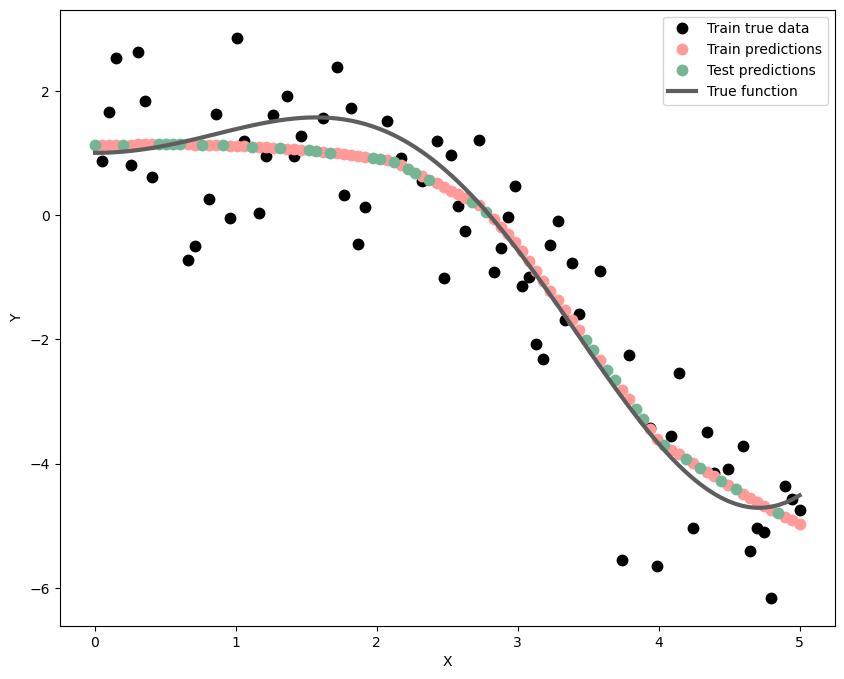

In [196]:
# use a batch size of 10
# use 1500 epochs

# use the train_model method to train the model
# use the eval_model method to plot the results
train_modelL1(model= l1_model,optimizer=optim, loss_fn=loss, x_dataset = x_train, y_dataset = y_train, epochs=1500, batch_size=10 )
eval_model(l1_model, x_train=x_train, y_train=y_train,x_test=x_test)
